# Dual Quaternion interpolation Method for Dual Quaternions

write about the new interpolation method

In [1]:
from neura_dual_quaternions import DualQuaternion, Quaternion
from DualQuaternionQuinticBlends.LineGenerator import LineGenerator
from DualQuaternionQuinticBlends.ArcGenerator import ArcGenerator
from DualQuaternionQuinticBlends.DQQBTrajectoryGenerator import DQQBTrajectoryGenerator

import numpy as np

%matplotlib widget
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [2]:
rx = np.array([1,0,0])
ry = np.array([0,1,0])
rz = np.array([0,0,1])

dq1 = DualQuaternion.fromQuatPos(Quaternion.fromAxisAngle(np.pi*0.0, rx), np.array([-1,0, 0]))
dq2 = DualQuaternion.fromQuatPos(Quaternion.fromAxisAngle(np.pi*0.0, rx), np.array([0, 0, 0 ]))
dq3 = DualQuaternion.fromQuatPos(Quaternion.fromAxisAngle(np.pi*0.0, rx), np.array([0, 1, 0 ]))
# dq4 = DualQuaternion.fromQuatPos(Quaternion.fromAxisAngle(np.pi*0.3, rx), np.array([0.7,0.8,0.1]))
# dq5 = DualQuaternion.fromQuatPos(Quaternion.fromAxisAngle(np.pi*1.1, rx), np.array([1,0,0.3]))
# dq6 = DualQuaternion.fromQuatPos(Quaternion.fromAxisAngle(np.pi*0.6, rx), np.array([1,-0.5,0]))

DQ_list = [dq1, dq2, dq3]

line_generator = LineGenerator()

segments = line_generator.generateSegments(DQ_list, 0.2, 2)

In [3]:
trajectory = DQQBTrajectoryGenerator(segments, 10, 100, 5, 100)

cnt:  1
acceleration limit for translational interpolation violated!
cnt:  2
cnt:  3
cnt:  4
cnt:  5
cnt:  6
cnt:  7
cnt:  8
cnt:  9
cnt:  10
[array([0, 0, 0]), array([-0.01302711,  0.        ,  0.        ]), array([0, 0, 0])]
[array([0, 0, 0]), array([0.        , 0.01302711, 0.        ]), array([0, 0, 0])]
[array([0, 0, 0]), array([0.2, 0. , 0. ]), array([0, 0, 0])]
[array([0, 0, 0]), array([0. , 0.2, 0. ]), array([0, 0, 0])]
[array([0, 0, 0]), array([0, 0, 0]), array([0, 0, 0])]
[array([0, 0, 0]), array([0, 0, 0]), array([0, 0, 0])]


In [4]:
time_vec = np.arange(0, trajectory.time_vector[-1]+0.001, 0.001)
qw = []
qx = []
qy = []
qz = []

x = []
y = []
z = []

vel_norm_list = []
acc_norm_list = []
jerk_norm_list = []

ang_vel_norm_list = []
ang_acc_norm_list = []
ang_jerk_norm_list = []

quaternion_list = []

for t in time_vec:
    
    pos, vel, acc, jerk, quaternion, ang_vel, ang_acc, ang_jerk = trajectory.evaluate(t)
    
    vel_norm_list.append(np.linalg.norm(vel))
    acc_norm_list.append(np.linalg.norm(acc))
    jerk_norm_list.append(np.linalg.norm(jerk))
    
    ang_vel_norm_list.append(np.linalg.norm(ang_vel))
    ang_acc_norm_list.append(np.linalg.norm(ang_acc))
    ang_jerk_norm_list.append(np.linalg.norm(ang_jerk))
    
    quaternion_list.append(quaternion)
    
    x.append(pos[0])
    y.append(pos[1])
    z.append(pos[2])
    
    qw.append(quaternion.w)
    qx.append(quaternion.x)
    qy.append(quaternion.y)
    qz.append(quaternion.z)


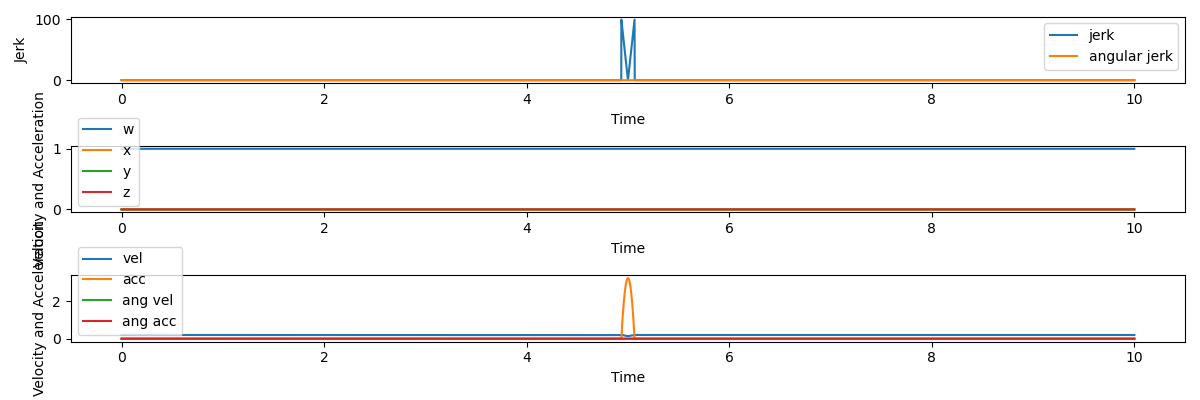

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 4))

# Plot the quaternion values in the first subplot (ax1)
ax1.plot(time_vec, jerk_norm_list, label = "jerk")
ax1.plot(time_vec, ang_jerk_norm_list, label = "angular jerk")
# ax1.plot(time_vec, jerk_norm_list, label = "jerk")
# ax1.plot(time_vec, ang_jerk_norm_list, label = "ang_jerk")
ax1.set_xlabel('Time')
ax1.set_ylabel('Jerk')
ax1.legend()

#ax2.plot(time_vec, vel_norm_list, label = "vel")
#ax2.plot(time_vec, acc_norm_list, label = "acc")

# ax2.plot(time_vec, ang_vel_norm_list, label = "ang vel")
# ax2.plot(time_vec, ang_acc_norm_list, label = "ang acc")
ax2.plot(time_vec, qw, label = "w")
ax2.plot(time_vec, qx, label = "x")
ax2.plot(time_vec, qy, label = "y")
ax2.plot(time_vec, qz, label = "z")

ax2.set_xlabel('Time')
ax2.set_ylabel('Velocity and Acceleration')
ax2.legend()


ax3.plot(time_vec, vel_norm_list, label = "vel")
ax3.plot(time_vec, acc_norm_list, label = "acc")

ax3.plot(time_vec, ang_vel_norm_list, label = "ang vel")
ax3.plot(time_vec, ang_acc_norm_list, label = "ang acc")

ax3.set_xlabel('Time')
ax3.set_ylabel('Velocity and Acceleration')
ax3.legend()

# # Adjust the layout and display the plot
plt.tight_layout()
plt.show()